In [1]:
from SparkEdgeEmuLib.connector import EmulatorConnector

In [2]:
connector = EmulatorConnector(usecase='usecase.yaml')

In [3]:
connector.deploy()

Deploy process: 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]


In [4]:
spark = connector.create_spark_session("test")

22/10/02 08:10:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
with connector.timer():
    for i in range(10):
        df = spark.read.parquet("/data/*")
        df.groupBy("DOLocationID").agg({'driver_pay':'avg'}).collect()
        df.groupby('Hvfhs_license_num').agg({'*': 'count'}).collect()
        df.agg({'tips': 'sum'}).collect()

In [6]:
res = connector.get_metrics()

/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:312: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp>=int(Timer.start.timestamp())*1000][df.timestamp<=int(Timer.end.timestamp())*1000]
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:312: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp>=int(Timer.start.timestamp())*1000][df.timestamp<=int(Timer.end.timestamp())*1000]
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:312: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp>=int(Timer.start.timestamp())*1000][df.timestamp<=int(Timer.end.timestamp())*1000]
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:312: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp>=int(Timer.start.timestamp())*1000][df.timestamp<=int(Timer.end.timestamp())*1000]


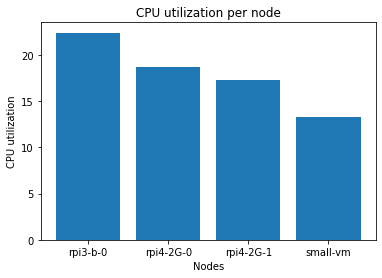

In [7]:
import matplotlib.pyplot as plt
xAxis = []
yAxis = []
name = "CPU utilization"
sorted_nodes = list(res.keys())
sorted_nodes.sort()
for node in sorted_nodes:
    r = res[node]
    xAxis.append(node)
    
    
    if name == "CPU utilization":
        val = r[r['cpu_util']>0].cpu_util.mean()
    if name == "tasks":
        r['tasks'] = -1*r.tasks.diff(periods=-1)
        val = r[r['tasks']>0].tasks.sum()
    if name == "Network Traffic":
        val = (r.network_rx_ether_net + r.network_rx_ether_net).diff().sum()
    if name == "Duration Seconds":
        val = r.duration_seconds.diff().sum()
    if name == "Input Bytes":
        val = r.input_bytes.diff().sum()
    if name == "Shuffle Read":
        val = r.shuffle_read.diff().sum()
    if name == "Shuffle Write":
        val = r.shuffle_write.diff().sum()
    if name == "Used Memory":
        val = r.used_memory.take([-1]).item()
    
    yAxis.append(val)

plt.bar(xAxis,yAxis)
plt.title(f'{name} per node')
plt.xlabel('Nodes')
plt.ylabel(f'{name}')
plt.show()

In [9]:
res['rpi3-b-0']

,memory,memory_util,cpu_util,count,timestamp,cpu,disk_writes,disk_reads,network_tx_ether_net,network_rx_ether_net,rdd_blocks,duration_seconds,gctime,input_bytes,shuffle_read,shuffle_write,on_heap_storage_memory,off_heap_storage_memory,tasks,used_memory
0,237928448.0,20.144404,0.084046,0,1664698223996,27.198587,32768.0,2953216.0,7820.0,13289.0,0.0,0.000,0.000,0.0,0.0,0.0,434031820.0,0.0,0.0,0.0
1,237928448.0,20.144404,0.083153,1,1664698228996,27.219375,32768.0,2953216.0,7820.0,13289.0,0.0,0.000,0.000,0.0,0.0,0.0,434031820.0,0.0,0.0,0.0
2,242954240.0,20.569917,1.239910,2,1664698233996,27.529352,32768.0,3043328.0,8252.0,13721.0,0.0,0.000,0.000,0.0,0.0,0.0,434031820.0,0.0,0.0,0.0
3,310956032.0,26.327343,32.929553,3,1664698238996,35.761741,32768.0,8978432.0,46819.0,52288.0,0.0,0.000,0.000,0.0,0.0,0.0,434031820.0,0.0,1.0,0.0
4,340475904.0,28.826667,32.170242,4,1664698243996,43.804301,32768.0,16359424.0,99427.0,105003.0,0.0,2.503,0.128,0.0,0.0,0.0,434031820.0,0.0,1.0,0.0
5,371470336.0,31.450835,17.527282,5,1664698248996,48.186122,32768.0,17248256.0,138448.0,144178.0,0.0,2.503,0.128,0.0,0.0,0.0,434031820.0,0.0,5.0,13944.0
6,380489728.0,32.214470,20.291542,6,1664698253996,53.259007,995328.0,18001920.0,418324.0,424312.0,0.0,23.524,1.481,156028.0,0.0,0.0,434031820.0,0.0,6.0,39018.0
7,425369600.0,36.014260,21.195037,7,1664698258996,58.557767,995328.0,28119040.0,496945.0,502801.0,0.0,33.909,1.545,156028.0,0.0,0.0,434031820.0,0.0,36.0,54229.0
8,450568192.0,38.147719,90.667064,8,1664698263996,81.224533,995328.0,28119040.0,532453.0,538351.0,0.0,35.560,1.681,182026.0,0.0,0.0,434031820.0,0.0,40.0,91901.0
9,496132096.0,42.005424,45.303522,9,1664698268996,92.550413,995328.0,52625408.0,981767.0,987665.0,0.0,61.979,2.929,6465953.0,292.0,438.0,434031820.0,0.0,64.0,76689.0


In [10]:
connector.undeploy()

Undeploy process: 100%|██████████| 4/4 [00:15<00:00,  3.82s/it]
